(98, 20)
not.fully.paid
0    88
1    10
Name: count, dtype: int64


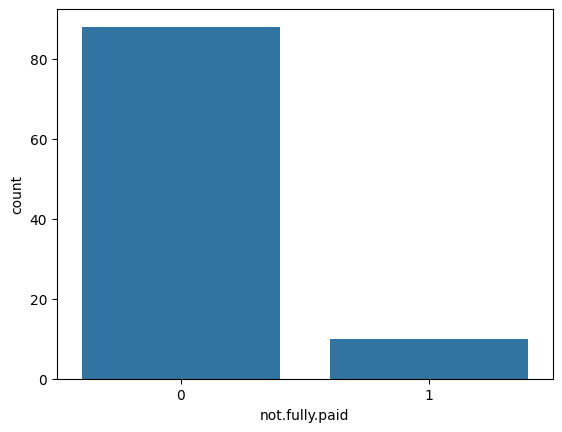

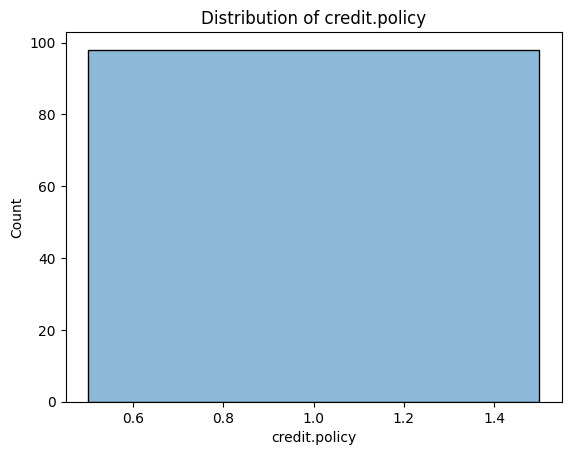

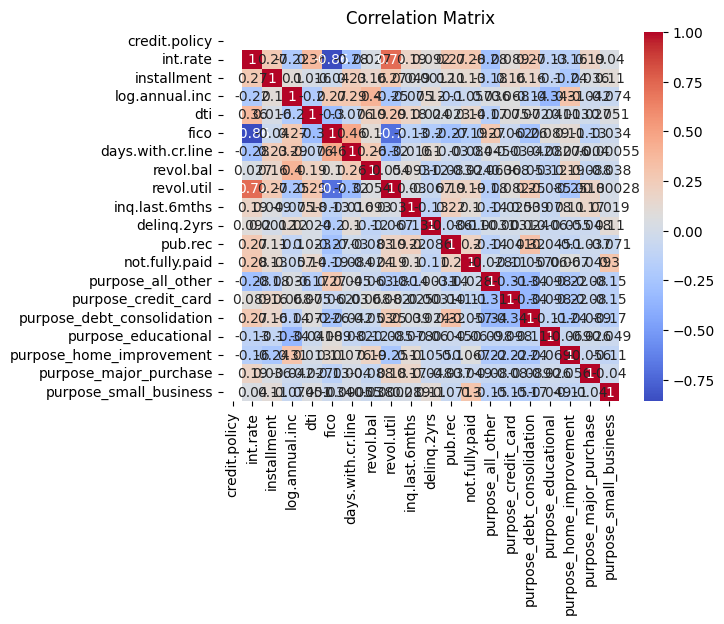

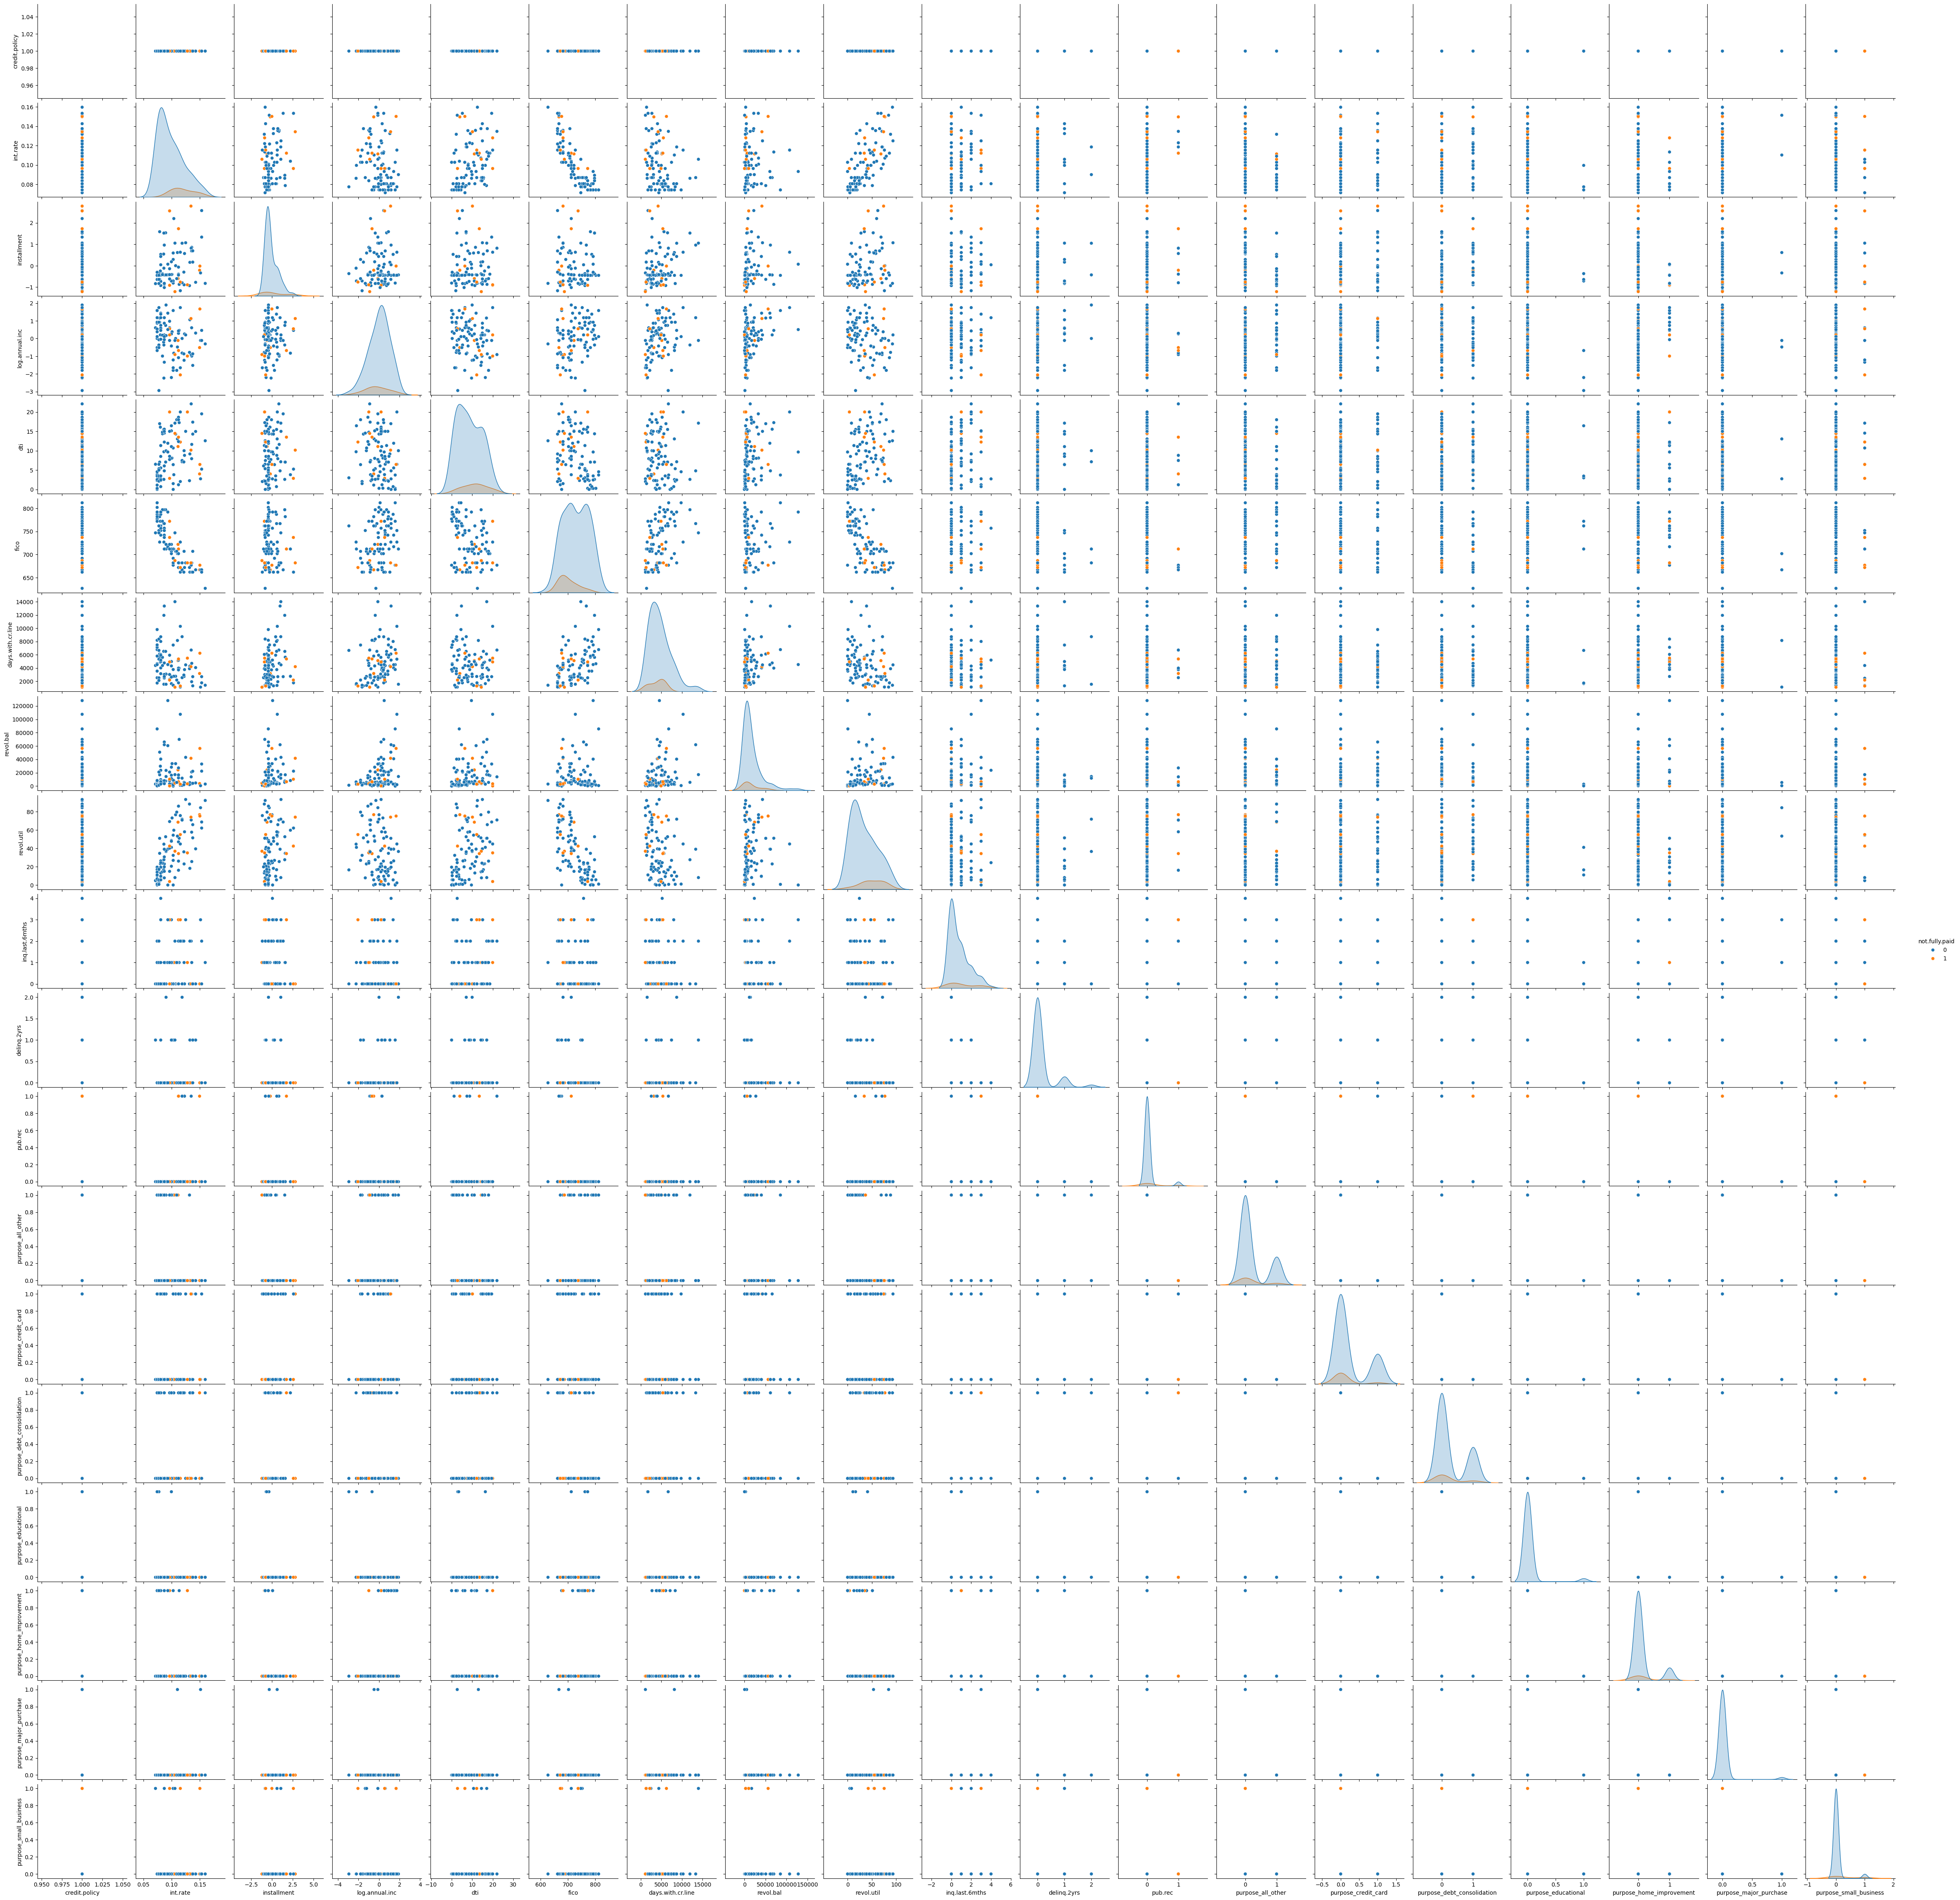

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy import stats

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CAPSTON PROJECT DATA SET/datacamp_workspace_export_2024-04-01 19_32_28.csv')

# Data cleaning and preprocessing
# Handling missing values
data.dropna(inplace=True)

# Converting categorical variables into numeric variables
data = pd.get_dummies(data, columns=['purpose'])

# Scaling/normalizing the data
scaler = StandardScaler()
data[['installment', 'log.annual.inc']] = scaler.fit_transform(data[['installment', 'log.annual.inc']])

# Handling outliers/anomalies (e.g., removing outliers using z-score)
z_scores = np.abs(stats.zscore(data[['installment', 'log.annual.inc']]))
data = data[(z_scores < 3).all(axis=1)]

# Addressing class imbalance by oversampling minority class
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

print(data.shape)
print(y.value_counts())
data.isnull().sum()
sns.countplot(x='not.fully.paid', data=data)
plt.show()

# Exploratory data analysis (EDA)
# Distributions of variables
sns.histplot(data['credit.policy'], kde=True)
plt.title('Distribution of credit.policy')
plt.show()

# Correlation between variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify patterns in the data
sns.pairplot(data, hue='not.fully.paid')
plt.show()


In [15]:
import numpy as np
import pandas as pd

In [16]:
%matplotlib inline

In [17]:
loans = pd.read_csv('/content/drive/MyDrive/CAPSTON PROJECT DATA SET/datacamp_workspace_export_2024-04-01 19_32_28.csv')

In [18]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
loans.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      5 non-null      int64  
 1   purpose            5 non-null      object 
 2   int.rate           5 non-null      float64
 3   installment        5 non-null      float64
 4   log.annual.inc     5 non-null      float64
 5   dti                5 non-null      float64
 6   fico               5 non-null      int64  
 7   days.with.cr.line  5 non-null      float64
 8   revol.bal          5 non-null      int64  
 9   revol.util         5 non-null      float64
 10  inq.last.6mths     5 non-null      int64  
 11  delinq.2yrs        5 non-null      int64  
 12  pub.rec            5 non-null      int64  
 13  not.fully.paid     5 non-null      int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 688.0+ bytes


In [20]:
loans.head().shape

(5, 14)

In [21]:
loans.head().describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,1.0,0.121020,337.888000,11.091236,13.694000,701.000000,3975.183333,20879.000000,53.420000,0.400000,0.200000,0.0,0.0
std,0.0,0.017947,291.625932,0.416248,4.213494,27.248853,1267.137358,15424.476085,21.809791,0.547723,0.447214,0.0,0.0
min,1.0,0.100800,102.920000,10.373491,8.100000,667.000000,2699.958333,3511.000000,25.600000,0.000000,0.000000,0.0,0.0
25%,1.0,0.107100,162.340000,11.082143,11.630000,682.000000,2760.000000,4740.000000,39.500000,0.000000,0.000000,0.0,0.0
50%,1.0,0.118900,228.220000,11.299732,14.290000,707.000000,4066.000000,28854.000000,52.100000,0.000000,0.000000,0.0,0.0
75%,1.0,0.135700,366.860000,11.350407,14.970000,712.000000,4710.000000,33623.000000,73.200000,1.000000,0.000000,0.0,0.0
max,1.0,0.142600,829.100000,11.350407,19.480000,737.000000,5639.958333,33667.000000,76.700000,1.000000,1.000000,0.0,0.0


Text(0.5, 0, 'FICO')

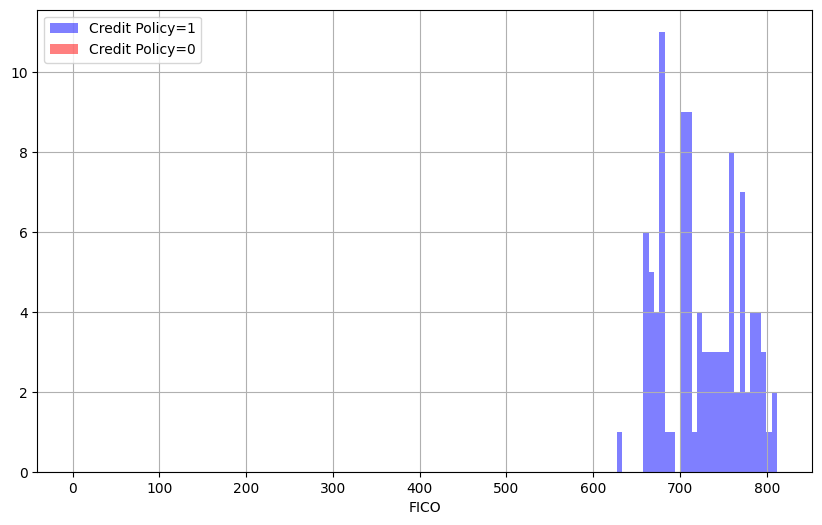

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

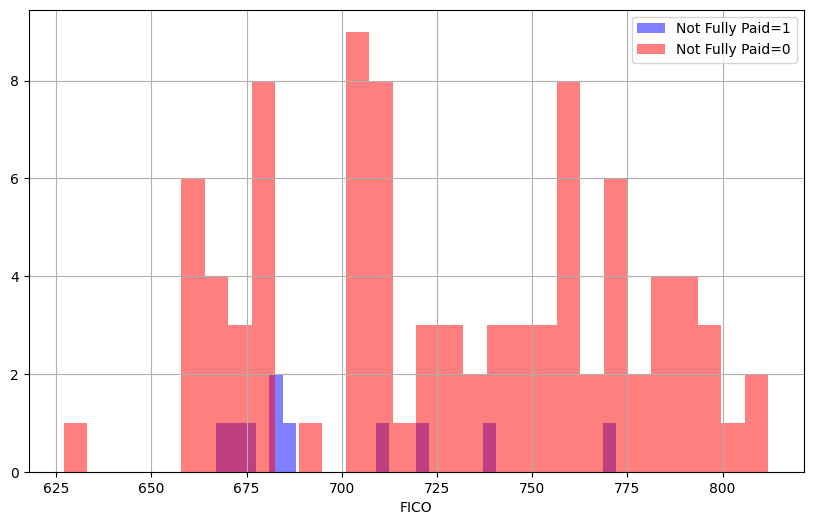

In [23]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Not Fully Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('FICO')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
loans = pd.read_csv("/content/drive/MyDrive/CAPSTON PROJECT DATA SET/datacamp_workspace_export_2024-04-01 19_32_28.csv")

<Axes: xlabel='purpose', ylabel='count'>

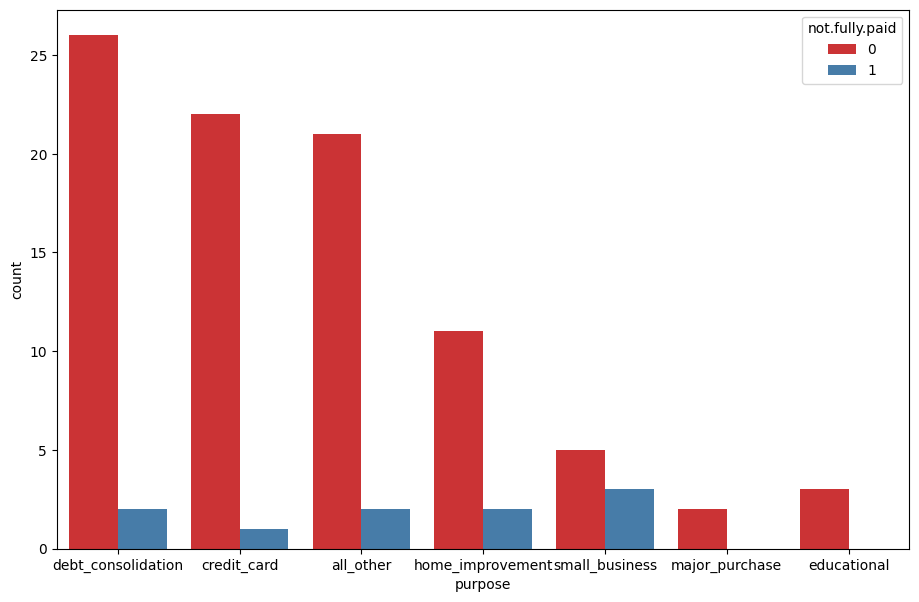

In [26]:
plt.figure(figsize=(11,7))
sns.countplot(x="purpose", hue="not.fully.paid", data=loans, palette="Set1")

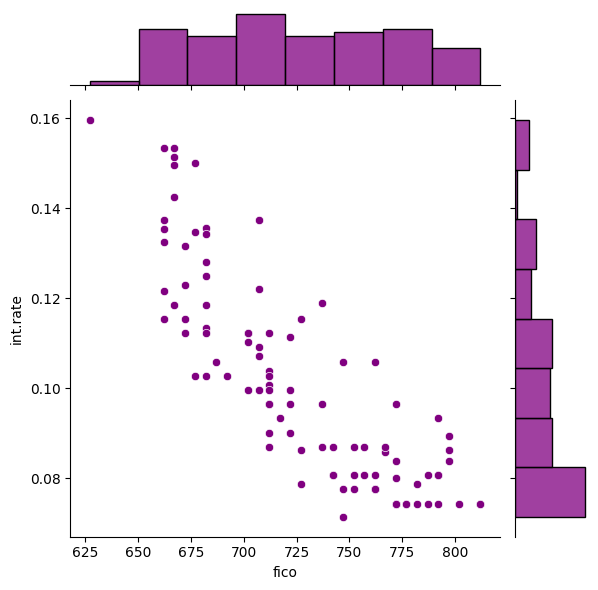

In [27]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 1100x700 with 0 Axes>

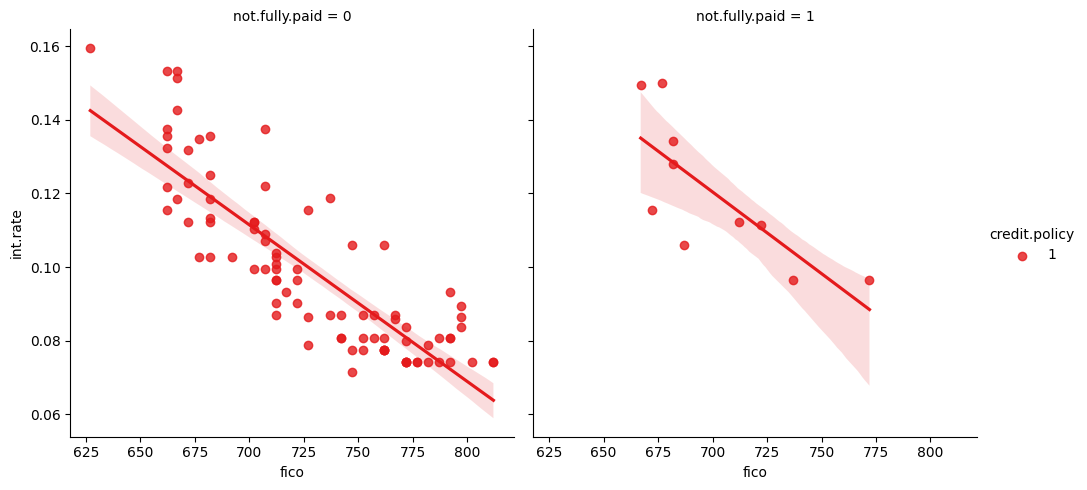

In [28]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int.rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log.annual.inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days.with.cr.line  100 non-null    float64
 8   revol.bal          100 non-null    int64  
 9   revol.util         100 non-null    float64
 10  inq.last.6mths     100 non-null    int64  
 11  delinq.2yrs        100 non-null    int64  
 12  pub.rec            100 non-null    int64  
 13  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [30]:
loan_purpose=['purpose']

In [31]:
final_data=pd.get_dummies(loans,columns=loan_purpose,drop_first=True)

In [32]:
# In the above code, drop_first is done to avoid multi-colinearity
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               100 non-null    int64  
 1   int.rate                    100 non-null    float64
 2   installment                 100 non-null    float64
 3   log.annual.inc              100 non-null    float64
 4   dti                         100 non-null    float64
 5   fico                        100 non-null    int64  
 6   days.with.cr.line           100 non-null    float64
 7   revol.bal                   100 non-null    int64  
 8   revol.util                  100 non-null    float64
 9   inq.last.6mths              100 non-null    int64  
 10  delinq.2yrs                 100 non-null    int64  
 11  pub.rec                     100 non-null    int64  
 12  not.fully.paid              100 non-null    int64  
 13  purpose_credit_card         100 non-

In [33]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("/content/drive/MyDrive/CAPSTON PROJECT DATA SET/datacamp_workspace_export_2024-04-01 19_32_28.csv")

loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


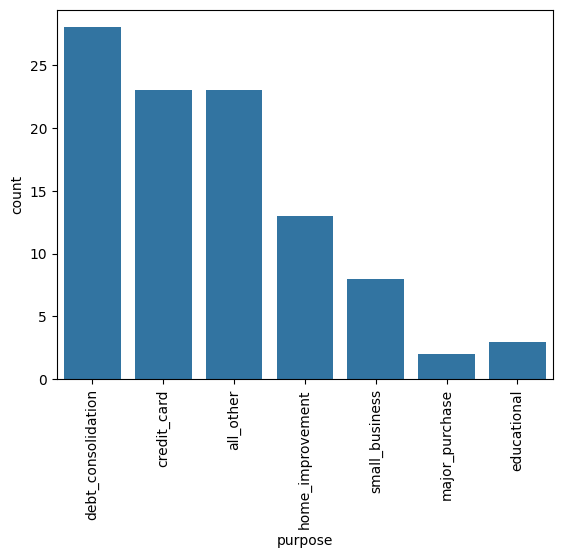

In [35]:
sns.countplot(x="purpose", data=loan_df)
plt.xticks(rotation=90)
plt.show()

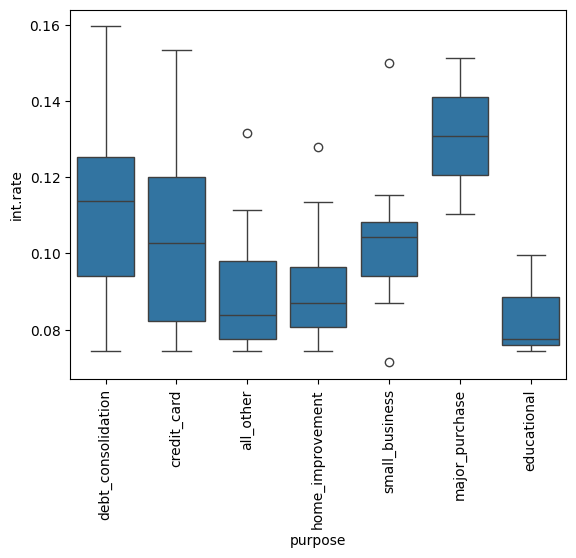

In [36]:
sns.boxplot(x="purpose", y="int.rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

In [99]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

loan_df = loan_df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
loan_df['not.fully.paid'] = le.fit_transform(loan_df['not.fully.paid'])

In [47]:
import pandas as pd

In [75]:
missing_cols = set(numerical_cols) - set(loan_df.columns)
print(f"Missing columns: {missing_cols}")

Missing columns: {'pub_rec', 'open_acc', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'revol_util', 'revol_bal'}


In [69]:
existing_columns = loan_df.columns
columns_to_drop = ['not.fully.paid', 'credit.policy', 'days.with.cr.line', 'purpose']

for column in columns_to_drop:
    if column not in existing_columns:
        print(f"{column} not found in DataFrame.")

credit.policy not found in DataFrame.
days.with.cr.line not found in DataFrame.
purpose not found in DataFrame.


In [70]:
loan_df = loan_df.drop(['not.fully.paid'], axis=1)

In [72]:
numerical_cols = ['int.rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util']

In [73]:
print(type(numerical_cols))

<class 'list'>


In [102]:
missing_cols = set(numerical_cols) - set(loan_df.columns)

In [104]:
scaler = StandardScaler()
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

In [105]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

loan_df = pd.concat([X_resampled, y_resampled], axis=1)
loan_df['not.fully.paid'].value_counts()

not.fully.paid
0    90
1    90
Name: count, dtype: int64

In [106]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
from sklearn.svm import SVC

In [109]:
!pip install scikit-learn

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [111]:
dt = DecisionTreeClassifier(random_state=42)

In [112]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Decision Tree Classifier Accuracy: 83.33%
Random Forest Classifier Accuracy: 88.89%
Logistic Regression Classifier Accuracy: 74.07%
Support Vector Machine Classifier Accuracy: 72.22%


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Best hyperparameters:", best_params)

Random Forest Classifier Evaluation Results:
Accuracy: 88.89%
Precision: 83.87%
Recall: 96.30%
F1 Score: 89.66%
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [122]:
!pip install gradio

In [123]:
import joblib

In [124]:
# Replace the following line with the actual code to define the best_model variable
best_model = ...

In [125]:
# Save the best model to disk
joblib.dump(best_model, 'loan_classifier.joblib')

['loan_classifier.joblib']

In [126]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy import stats

In [127]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CAPSTON PROJECT DATA SET/datacamp_workspace_export_2024-04-01 19_32_28.csv')

In [129]:
import gradio as gr
import joblib
# Load the trained model
model = joblib.load("loan_classifier.joblib")


def predict_loan_status(
    int_rate,
    installment,
    log_annual_inc,
    dti,
    fico,
    revol_bal,
    revol_util,
    inq_last_6mths,
    delinq_2yrs,
    pub_rec,

):
    input_dict = {
        "int.rate": int_rate,
        "installment": installment,
        "log.annual.inc": log_annual_inc,
        "dti": dti,
        "fico": fico,
        "revol.bal": revol_bal,
        "revol.util": revol_util,
        "inq.last.6mths": inq_last_6mths,
        "delinq.2yrs": delinq_2yrs,
        "pub.rec": pub_rec,


    }
    # Convert the dictionary to a 2D array
    input_array = [list(input_dict.values())]
    prediction = model.predict(input_array)[0]

    if prediction == 0:
        return "Loan fully paid"
    else:
        return "Loan not fully paid"


inputs = [
    gr.Slider(0.06, 0.23, step=0.01, label="Interest Rate"),
    gr.Slider(100, 950, step=10, label="Installment"),
    gr.Slider(7, 15, step=0.1, label="Log Annual Income"),
    gr.Slider(0, 40, step=1, label="DTI Ratio"),
    gr.Slider(600, 850, step=1, label="FICO Score"),
    gr.Slider(0, 120000, step=1000, label="Revolving Balance"),
    gr.Slider(0, 120, step=1, label="Revolving Utilization"),
    gr.Slider(0, 10, step=1, label="Inquiries in Last 6 Months"),
    gr.Slider(0, 20, step=1, label="Delinquencies in Last 2 Years"),
    gr.Slider(0, 10, step=1, label="Public Records"),

]
outputs = [gr.Label(num_top_classes=2)]

title = "Loan Approval Classifier"
description = (
    "Enter the details of the loan applicant to check if the loan is approved or not."
)
gr.Interface(
    fn=predict_loan_status,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d7c01e3765b2e4f1e2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
